In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('FDATA.csv')    

In [6]:
df.head()

,ZONE,CIRCLE,DIVISION,SUBDIVISION,SUBSTATION,DATEOFDTC,NAME_OF_WORKSHOP,CAPICITY_IN_KVA,DTC_NO_JOB_NO,OBSERVATION_DURING_DTC,PLACE_OF_DAMAGED,PROBABLE_CAUSE,tempmax,tempmin,temp,humidity,precip,conditions
0,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-IV NEWADA,NEWADA,03/22/2025,DPH,25,VW1B0003057,2 leg HT/LT Coil Burn,NEWADA,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
1,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-III BADAGAON,ANEI,03/22/2025,DPH,63,VW1B0003058,HT/LT Coil Damage,KATHIRAW,LT SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
2,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-IV NEWADA,GAJOKHAR,03/22/2025,DPH,10,VW1B0003059,HT/LT Coil Damage,PRIMARY SCHOOL JHANJHAUR,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
3,VARANASI 1,EDC VARANASI,EDD-2 VARANASI,EDSD SEWAPURI,SEWAPURI,03/22/2025,DPH,10,VW1B0003067,HT/LT Coil Damage,GAHARPUR,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
4,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-III BADAGAON,ANEI,03/22/2025,DPH,25,VW1B0003068,2 leg HT/LT Coil Burn,SIHIPUR,UNBALANCING,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77462 entries, 0 to 77461
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZONE                    77462 non-null  object 
 1   CIRCLE                  77462 non-null  object 
 2   DIVISION                77462 non-null  object 
 3   SUBDIVISION             77462 non-null  object 
 4   SUBSTATION              77462 non-null  object 
 5   DATEOFDTC               77462 non-null  object 
 6   NAME_OF_WORKSHOP        77462 non-null  object 
 7   CAPICITY_IN_KVA         77462 non-null  int64  
 8   DTC_NO_JOB_NO           77462 non-null  object 
 9   OBSERVATION_DURING_DTC  77462 non-null  object 
 10  PLACE_OF_DAMAGED        77462 non-null  object 
 11  PROBABLE_CAUSE          77462 non-null  object 
 12  tempmax                 77462 non-null  float64
 13  tempmin                 77462 non-null  float64
 14  temp                    77462 non-null

In [8]:
df.isnull().sum()   

ZONE                      0
CIRCLE                    0
DIVISION                  0
SUBDIVISION               0
SUBSTATION                0
DATEOFDTC                 0
NAME_OF_WORKSHOP          0
CAPICITY_IN_KVA           0
DTC_NO_JOB_NO             0
OBSERVATION_DURING_DTC    0
PLACE_OF_DAMAGED          0
PROBABLE_CAUSE            0
tempmax                   0
tempmin                   0
temp                      0
humidity                  0
precip                    0
conditions                0
dtype: int64

In [10]:
df.columns

Index(['ZONE', 'CIRCLE', 'DIVISION', 'SUBDIVISION', 'SUBSTATION', 'DATEOFDTC',
       'NAME_OF_WORKSHOP', 'CAPICITY_IN_KVA', 'DTC_NO_JOB_NO',
       'OBSERVATION_DURING_DTC', 'PLACE_OF_DAMAGED', 'PROBABLE_CAUSE',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'conditions'],
      dtype='object')

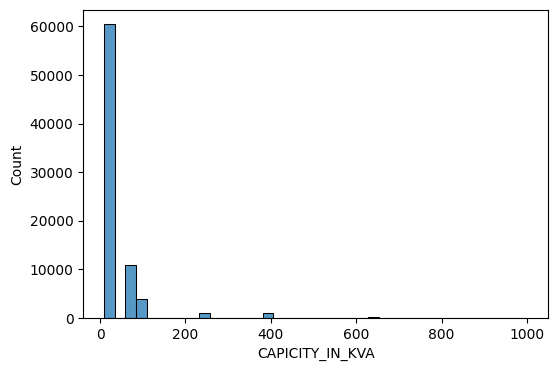

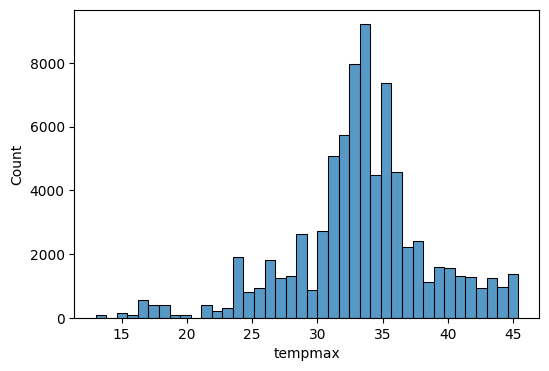

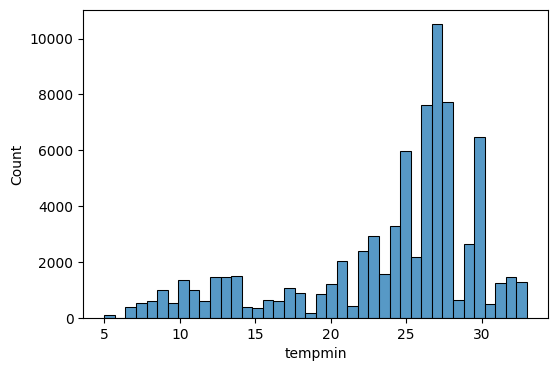

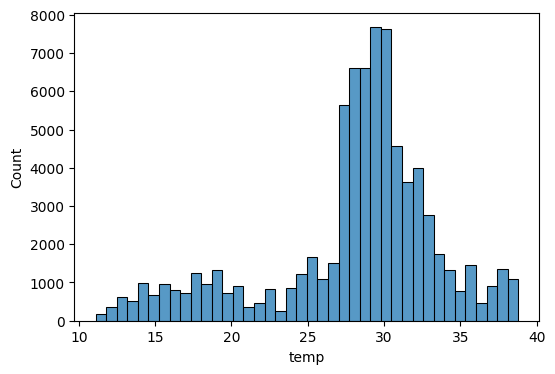

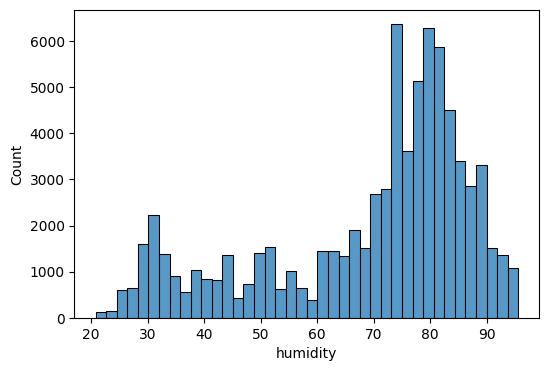

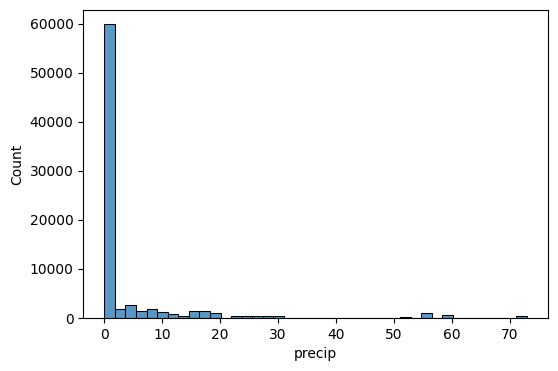

In [27]:
numeric_columns = ['CAPICITY_IN_KVA',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip']
for col in numeric_columns:
    plt.figure(figsize=(6, 4)) # 600x400 pixels
    sns.histplot(df[col],bins=40) 

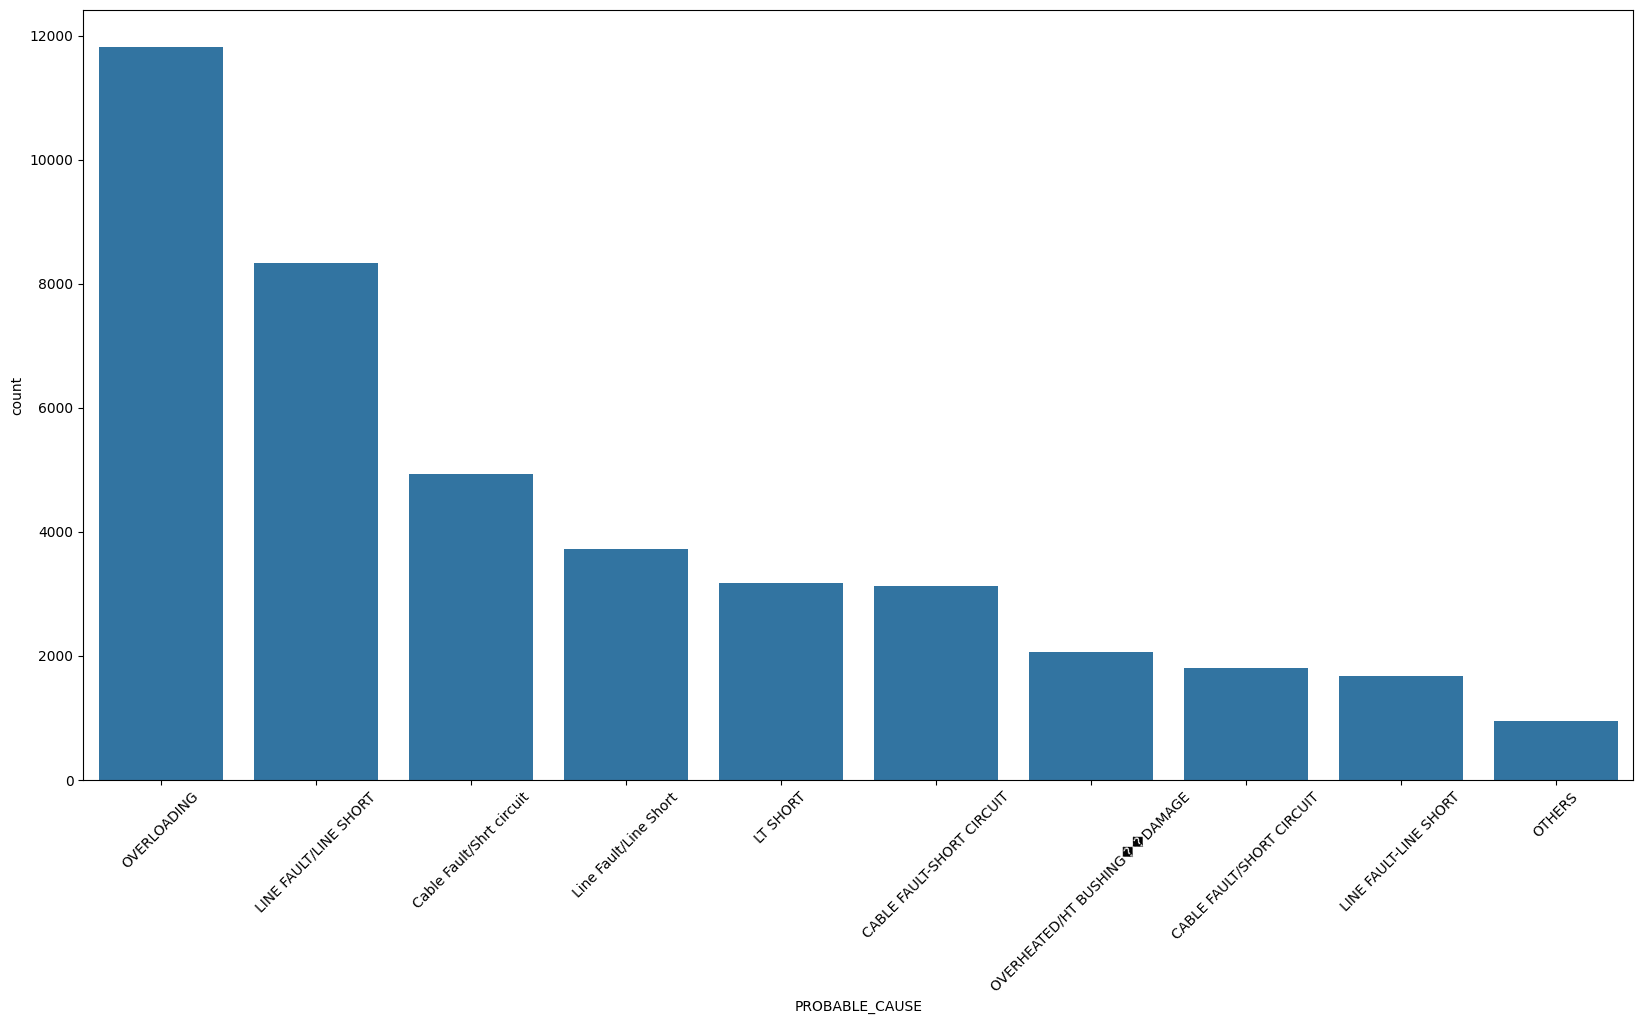

In [105]:
top15_causes = df_cleaned['PROBABLE_CAUSE'].value_counts().head(15).index

plt.figure(figsize=(20, 10))
sns.countplot(x=df_cleaned['PROBABLE_CAUSE'],order=top15_causes)
plt.xticks(rotation=45) # Rotate labels for better spacing
plt.show()

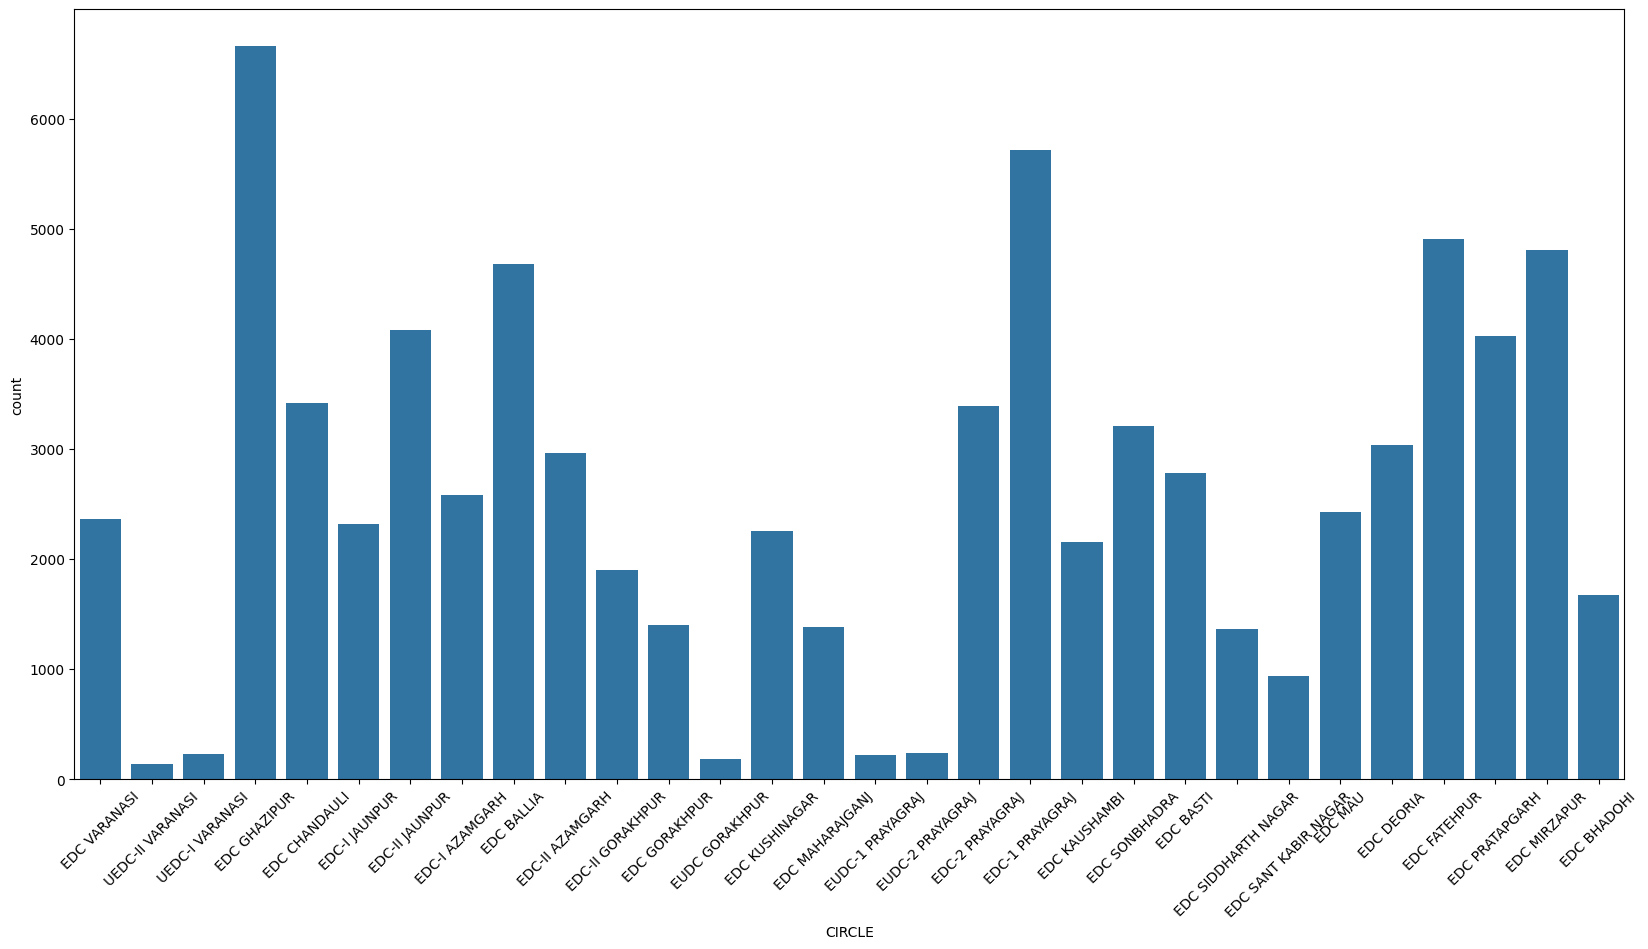

In [67]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["CIRCLE"])
plt.xticks(rotation=45) # Rotate labels for better spacing
plt.show()

<Axes: >

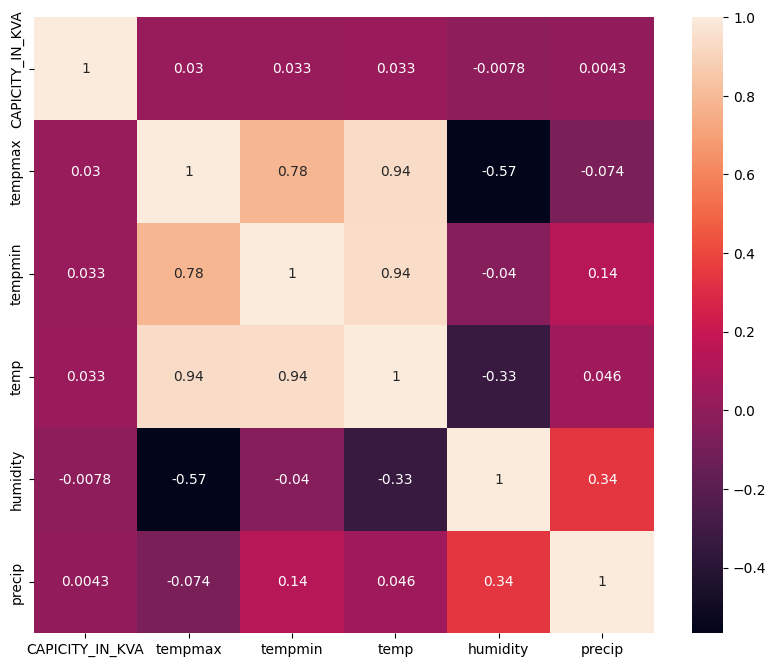

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# DATA Cleaning and Preprocessing

In [34]:
df.isnull().sum()

ZONE                      0
CIRCLE                    0
DIVISION                  0
SUBDIVISION               0
SUBSTATION                0
DATEOFDTC                 0
NAME_OF_WORKSHOP          0
CAPICITY_IN_KVA           0
DTC_NO_JOB_NO             0
OBSERVATION_DURING_DTC    0
PLACE_OF_DAMAGED          0
PROBABLE_CAUSE            0
tempmax                   0
tempmin                   0
temp                      0
humidity                  0
precip                    0
conditions                0
dtype: int64

In [90]:
df_cleaned = df.copy()
df_cleaned.shape

(77462, 18)

In [91]:
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(77361, 18)

In [92]:
df_cleaned.head()

,ZONE,CIRCLE,DIVISION,SUBDIVISION,SUBSTATION,DATEOFDTC,NAME_OF_WORKSHOP,CAPICITY_IN_KVA,DTC_NO_JOB_NO,OBSERVATION_DURING_DTC,PLACE_OF_DAMAGED,PROBABLE_CAUSE,tempmax,tempmin,temp,humidity,precip,conditions
0,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-IV NEWADA,NEWADA,03/22/2025,DPH,25,VW1B0003057,2 leg HT/LT Coil Burn,NEWADA,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
1,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-III BADAGAON,ANEI,03/22/2025,DPH,63,VW1B0003058,HT/LT Coil Damage,KATHIRAW,LT SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
2,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-IV NEWADA,GAJOKHAR,03/22/2025,DPH,10,VW1B0003059,HT/LT Coil Damage,PRIMARY SCHOOL JHANJHAUR,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
3,VARANASI 1,EDC VARANASI,EDD-2 VARANASI,EDSD SEWAPURI,SEWAPURI,03/22/2025,DPH,10,VW1B0003067,HT/LT Coil Damage,GAHARPUR,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
4,VARANASI 1,EDC VARANASI,EDD-1 VARANASI,EDSD-III BADAGAON,ANEI,03/22/2025,DPH,25,VW1B0003068,2 leg HT/LT Coil Burn,SIHIPUR,UNBALANCING,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"


In [93]:
df_cleaned.drop(columns=['SUBDIVISION','DIVISION','SUBSTATION','NAME_OF_WORKSHOP','PLACE_OF_DAMAGED'],inplace = True)


In [95]:
df_cleaned.head()
df_cleaned.drop(columns=['DTC_NO_JOB_NO'],inplace = True)


In [74]:
df_cleaned.head()



,ZONE,CIRCLE,SUBSTATION,DATEOFDTC,CAPICITY_IN_KVA,OBSERVATION_DURING_DTC,PROBABLE_CAUSE,tempmax,tempmin,temp,humidity,precip,conditions
0,VARANASI 1,EDC VARANASI,NEWADA,03/22/2025,25,2 leg HT/LT Coil Burn,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
1,VARANASI 1,EDC VARANASI,ANEI,03/22/2025,63,HT/LT Coil Damage,LT SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
2,VARANASI 1,EDC VARANASI,GAJOKHAR,03/22/2025,10,HT/LT Coil Damage,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
3,VARANASI 1,EDC VARANASI,SEWAPURI,03/22/2025,10,HT/LT Coil Damage,LINE FAULT/LINE SHORT,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
4,VARANASI 1,EDC VARANASI,ANEI,03/22/2025,25,2 leg HT/LT Coil Burn,UNBALANCING,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"


In [96]:
df_cleaned['ZONE'].value_counts()

ZONE
PRAYAGRAJ 2    20149
VARANASI 2     16485
AZAMGARH       12638
MIRZAPUR        9677
GORAKHPUR 2     6661
BASTI           5083
GORAKHPUR 1     3485
VARANASI 1      2729
PRAYAGRAJ 1      454
Name: count, dtype: int64

In [97]:
df_cleaned['OBSERVATION_DURING_DTC'].value_counts()

OBSERVATION_DURING_DTC
NO_OBSERVATION                                    20789
ALL HT & LT COIL DAMAGE                            4925
ALL COIL DAMAGE                                    2652
1 LEG HV COIL DAMAGE                               1817
2 LEG HV COIL DAMAGE                               1689
                                                  ...  
2 LEG HT COIL DAMAGE & 2 NO LT BUSHING DAMAGE.        1
3 Leg Coil Damage & Over Heated                       1
ALL HV PHASE COIL DAMAGE DUE TO OVERLOAD              1
01 LEG HT COIL DAMAGED 02 LEG LT DAMAGED              1
1 LEG HT COIL DAMAGE & 1 NO LT BUSHING DAMAGE/        1
Name: count, Length: 1753, dtype: int64

In [98]:
top15_obs = df_cleaned['OBSERVATION_DURING_DTC'].value_counts().head(15).index
df_cleaned = df_cleaned[df_cleaned['OBSERVATION_DURING_DTC'].isin(top15_obs)]
df_cleaned.shape
df_cleaned['OBSERVATION_DURING_DTC'].value_counts()

OBSERVATION_DURING_DTC
NO_OBSERVATION             20789
ALL HT & LT COIL DAMAGE     4925
ALL COIL DAMAGE             2652
1 LEG HV COIL DAMAGE        1817
2 LEG HV COIL DAMAGE        1689
HT/LT DAMAGE                1611
DELTA CONNECTION BROKEN     1570
1 LEG HT DAMAGE             1549
HVLV TWO LEG DAMAGE         1542
HT & LT COIL DAMAGE         1530
1 HT/LT coil damage         1494
HV COIL DAMAGE              1330
1 LEG HT/LT DAMAGE          1202
HVLV ONE LEG DAMAGE         1124
HVLV THREE LEG DAMAGE       1066
Name: count, dtype: int64

In [99]:
df_cleaned.shape

(45890, 12)

In [100]:
df_cleaned.head()

,ZONE,CIRCLE,DATEOFDTC,CAPICITY_IN_KVA,OBSERVATION_DURING_DTC,PROBABLE_CAUSE,tempmax,tempmin,temp,humidity,precip,conditions
5,VARANASI 1,UEDC-II VARANASI,03/22/2025,250,HT & LT COIL DAMAGE,OTHER,33.0,15.4,24.7,39.1,0.9,"Rain, Partially cloudy"
2729,VARANASI 2,EDC GHAZIPUR,03/24/2025,25,ALL HT & LT COIL DAMAGE,OVERLOADING,33.0,17.0,25.2,48.3,0.0,Clear
2730,VARANASI 2,EDC GHAZIPUR,03/24/2025,25,ALL HT & LT COIL DAMAGE,OVERLOADING,33.0,17.0,25.2,48.3,0.0,Clear
2732,VARANASI 2,EDC GHAZIPUR,03/24/2025,63,ALL HT & LT COIL DAMAGE,LINE FAULT/LINE SHORT,33.0,17.0,25.2,48.3,0.0,Clear
2735,VARANASI 2,EDC CHANDAULI,03/23/2025,10,DELTA CONNECTION BROKEN,LINE FAULT/LINE SHORT,31.4,16.7,25.0,40.2,0.0,Clear


In [101]:
df_cleaned['PROBABLE_CAUSE'].value_counts()

PROBABLE_CAUSE
OVERLOADING                                   11824
LINE FAULT/LINE SHORT                          8337
Cable Fault/Shrt circuit                       4931
Line Fault/Line Short                          3720
LT SHORT                                       3169
CABLE FAULT-SHORT CIRCUIT                      3119
OVERHEATED/HT BUSHING��DAMAGE                  2068
CABLE FAULT/SHORT CIRCUIT                      1803
LINE FAULT-LINE SHORT                          1678
OTHERS                                          953
UNBALANCING                                     689
OVERHEATED/HT BUSHING DAMAGE                    588
others /DUE TO LIGHTNING                        524
others                                          456
UNBLANCING                                      413
Overloading                                     405
overheating/HT BushingDamage                    388
LOW OIL LEVEL                                   386
others /INTERNAL FAULT                          1

In [104]:
top10_causes = df_cleaned['PROBABLE_CAUSE'].value_counts().head(10).index
df_cleaned = df_cleaned[df_cleaned['PROBABLE_CAUSE'].isin(top10_causes)]
df_cleaned.shape

(41602, 12)